## **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_csv("/content/dataset.csv")

<ipython-input-2-5ed13cc08211>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/dataset.csv")


In [3]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   adm0_id             1048575 non-null  int64  
 1   adm0_name           1048575 non-null  object 
 2   adm1_id             1048575 non-null  int64  
 3   adm1_name           661028 non-null   object 
 4   mkt_id              1048575 non-null  int64  
 5   mkt_name            1048575 non-null  object 
 6   cm_id               1048575 non-null  int64  
 7   cm_name             1048575 non-null  object 
 8   cur_id              1048575 non-null  int64  
 9   cur_name            1048575 non-null  object 
 10  pt_id               1048575 non-null  int64  
 11  pt_name             1048575 non-null  object 
 12  um_id               1048575 non-null  int64  
 13  um_name             1048575 non-null  object 
 14  mp_month            1048575 non-null  int64  
 15  mp_year        

In [5]:
df.isnull().sum()

,0
adm0_id,0
adm0_name,0
adm1_id,0
adm1_name,387547
mkt_id,0
mkt_name,0
cm_id,0
cm_name,0
cur_id,0
cur_name,0


## **Data Cleaning**

In [6]:
df2 = df.drop(columns=["mp_commoditysource"], errors='ignore')

In [7]:
df2.fillna("Unknown", inplace=True)

In [8]:
df2 = df2.drop_duplicates()

In [9]:
df2["adm1_id"] = pd.to_numeric(df2["adm1_id"], errors="coerce")

In [10]:
df2.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,1,2014,50.0
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,2,2014,50.0
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,3,2014,50.0
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,4,2014,50.0
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0,AFN,15,Retail,5,KG,5,2014,50.0


##**Feature Selection**

In [11]:
selected_features = ["adm0_name", "adm1_name", "mkt_name", "mp_price"]

In [12]:
df3 = df2[selected_features]

In [13]:
#Using Label Encoding to categorize the numerical data
le_country = LabelEncoder()
le_region = LabelEncoder()
le_market = LabelEncoder()

df3["Country"] = le_country.fit_transform(df3["adm0_name"])
df3["Region"] = le_region.fit_transform(df3["adm1_name"])
df3["Market"] = le_market.fit_transform(df3["mkt_name"])

<ipython-input-13-3f5e08bbc0c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Country"] = le_country.fit_transform(df3["adm0_name"])
<ipython-input-13-3f5e08bbc0c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Region"] = le_region.fit_transform(df3["adm1_name"])
<ipython-input-13-3f5e08bbc0c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [14]:
df3["mp_price"] = pd.to_numeric(df3["mp_price"], errors="coerce")

# Fill NaN values in price with the mean of the column
df3["mp_price"].fillna(df3["mp_price"].mean(), inplace=True)

# Normalize price data
scaler = StandardScaler()
df3["Price"] = scaler.fit_transform(df3[["mp_price"]])

<ipython-input-14-ce0b6a340bd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["mp_price"] = pd.to_numeric(df3["mp_price"], errors="coerce")
<ipython-input-14-ce0b6a340bd6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["mp_price"].fillna(df3["mp_price"].mean(), inplace=True)

In [15]:
df3 = df3.drop(columns=["adm0_name", "adm1_name", "mkt_name"])

In [16]:
df3.head()

,mp_price,Country,Region,Market,Price
0,50.0,0,31,556,-0.06642
1,50.0,0,31,556,-0.06642
2,50.0,0,31,556,-0.06642
3,50.0,0,31,556,-0.06642
4,50.0,0,31,556,-0.06642


## **Applying K-Means Clustering**

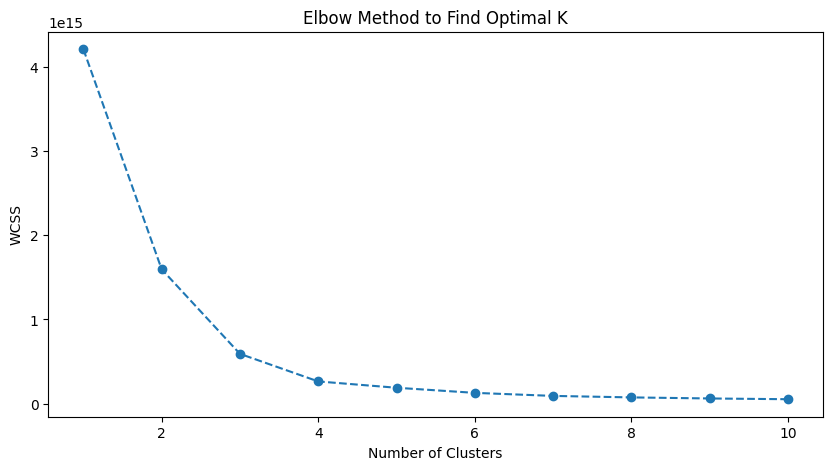

In [17]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


In [18]:
# Apply K-Means with the optimal number of clusters (adjust based on elbow point)
optimal_k = 4  # Change based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df3["Cluster"] = kmeans.fit_predict(df3)

# Show cluster counts
print("\nCluster Assignments:")
print(df3["Cluster"].value_counts())



Cluster Assignments:
Cluster
0    1047592
3        533
1        447
2          3
Name: count, dtype: int64


##**Using PCA**

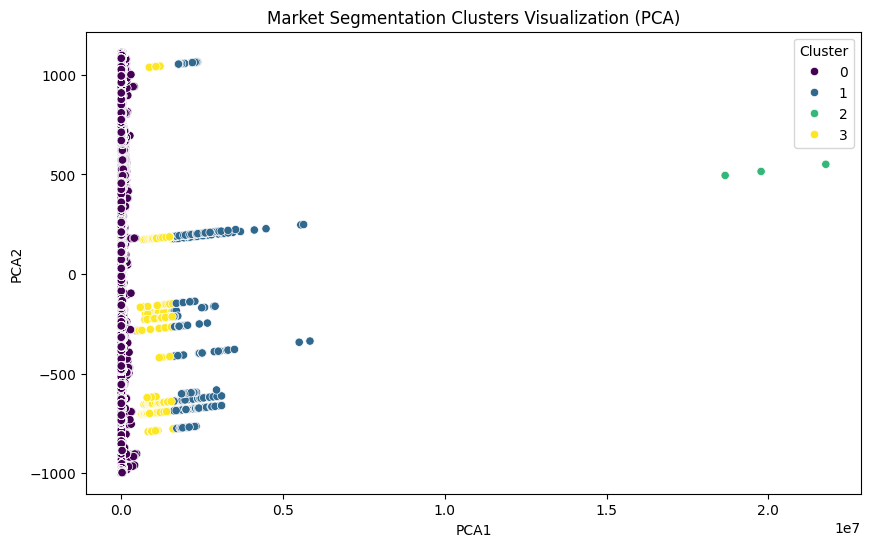

In [19]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df3["PCA1"] = pca.fit_transform(df3)[:, 0]
df3["PCA2"] = pca.fit_transform(df3)[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df3, palette="viridis")
plt.title("Market Segmentation Clusters Visualization (PCA)")
plt.show()

##**Geographic & Pricing Insights**

In [20]:
# Analyze cluster statistics
geo_price_summary = df.groupby(df3["Cluster"]).agg({
    "adm0_name": "nunique",
    "adm1_name": "nunique",
    "mkt_name": "nunique",
    "mp_price": ["mean", "median", "min", "max"]
}).rename(columns={"adm0_name": "Unique Countries", "adm1_name": "Unique Regions", "mkt_name": "Unique Markets"})

# Display insights
print("\nGeographic & Price-Based Market Segments:")
print(geo_price_summary)



Geographic & Price-Based Market Segments:
        Unique Countries Unique Regions Unique Markets      mp_price  \
                 nunique        nunique        nunique          mean   
Cluster                                                                
0                     74            429           2100  2.747760e+03   
1                      2             11             12  2.229259e+06   
2                      1              1              1  2.007407e+07   
3                      2             11             12  9.961301e+05   

                                             
             median         min         max  
Cluster                                      
0             200.0         0.0    489333.0  
1         2088888.0   1625000.0   5833333.0  
2        19777777.0  18666666.0  21777780.0  
3          960000.0    516666.5   1602900.0  
